In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn import linear_model

df= pd.read_csv('Advertising.csv')


In [12]:
import pandas as pd 

df = pd.read_csv('day.csv')

Más informacióm del dataset 

El objetivo es predecir cuantas vicicletas se van a rentar

https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset


Quita las variables de casual, registered, instant, fecha, mes, año de tu entrenamiento

Hay varias categoricas, cuales son? coviertelas e one hot encoding 

Crea variables dummy 

In [13]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [14]:
df.season.unique()

array([1, 2, 3, 4])

In [15]:
df[['casual', 'cnt']].corr()

,casual,cnt
casual,1.000000,0.672804
cnt,0.672804,1.000000


In [16]:
df.drop(['casual', 'registered', 'instant', 'dteday', 'mnth', 'yr'], axis=1, inplace=True)


### One hot encoding 

In [17]:
categorical_features = ['season', 'weathersit', 'weekday']


### Dummies

In [18]:
df = pd.get_dummies(df, columns=categorical_features)


### Regresion / modelo

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

X = df.drop('cnt', axis=1)
y = df['cnt']


$MSE$ y $ R^2 $

In [20]:
model= linear_model.LinearRegression().fit(X, y)

predicciones= model.predict(X)

# Calcular métricas de rendimiento
r2 = r2_score(y_pred=predicciones, y_true=y)
mse_per_sample = (y - predicciones) ** 2

mse = mean_squared_error(y_pred=predicciones, y_true=y)

print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

Mean Squared Error: 1633053.2252380387
R^2 Score: 0.5642465831561199


In [21]:
df.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_1,season_2,season_3,...,weathersit_1,weathersit_2,weathersit_3,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.344167,0.363625,0.805833,0.160446,985,True,False,False,...,False,True,False,False,False,False,False,False,False,True
1,0,0,0.363478,0.353739,0.696087,0.248539,801,True,False,False,...,False,True,False,True,False,False,False,False,False,False
2,0,1,0.196364,0.189405,0.437273,0.248309,1349,True,False,False,...,True,False,False,False,True,False,False,False,False,False
3,0,1,0.200000,0.212122,0.590435,0.160296,1562,True,False,False,...,True,False,False,False,False,True,False,False,False,False
4,0,1,0.226957,0.229270,0.436957,0.186900,1600,True,False,False,...,True,False,False,False,False,False,True,False,False,False


In [22]:
model.coef_

array([ -403.12490224,   224.70964918,  5575.50763785,   662.0024591 ,
       -2530.55158701, -3256.46312808,  -720.13063342,   198.01291413,
        -249.75245001,   771.8701693 ,   750.92049619,   497.58656496,
       -1248.50706115,  -118.27197667,  -145.57640352,   -68.96536315,
          14.79030666,    -7.92574715,    29.2619541 ,   296.68722973])

In [ ]:
model.intercept_

np.float64(2892.2342242060995)

In [24]:
predicciones= model.predict(X)


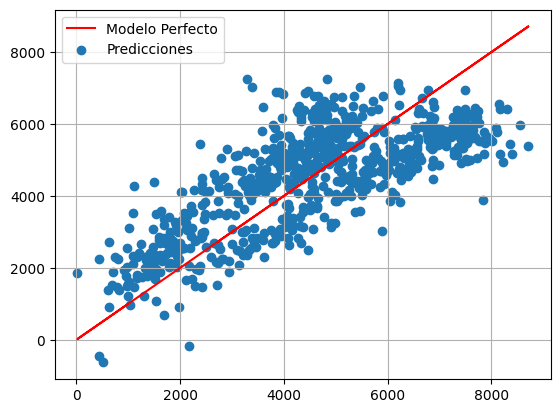

In [29]:
from matplotlib import pyplot as plt

# Use the training data for plotting the predictions
plt.plot(y, y, color='red', label='Modelo Perfecto')
plt.scatter(y, predicciones, label='Predicciones')
plt.grid()
plt.legend()
plt.show()